In [82]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from statistics import mean
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import pickle

In [83]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [84]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [85]:
max(y_train), min(y_train)

(19.62964108978934, 13.9108207377686)

In [86]:
x_train.shape[0] * 0.8

8911.2

In [87]:
x_train_set = x_train[:8912]
x_val = x_train[8912:]
y_train_set = y_train[:8912]
y_val = y_train[8912:]

### Ridge 

In [88]:
error = []

alpha = []
 
for i in range(1, 10):
    ridgeModel = Ridge(alpha = i * 0.05)
    ridgeModel.fit(x_train, y_train)
    val_prediction = ridgeModel.predict(x_val)
    scores = round(metrics.mean_absolute_error(y_val, val_prediction), 3)
    error.append(scores)
    alpha.append(i * 0.05)

for i in range(len(error)) : 
    print(f'aplha = {alpha[i]} --> RMSE = {error[i]}')

aplha = 0.05 --> RMSE = 1.024
aplha = 0.1 --> RMSE = 1.024
aplha = 0.15000000000000002 --> RMSE = 1.024
aplha = 0.2 --> RMSE = 1.024
aplha = 0.25 --> RMSE = 1.024
aplha = 0.30000000000000004 --> RMSE = 1.024
aplha = 0.35000000000000003 --> RMSE = 1.024
aplha = 0.4 --> RMSE = 1.024
aplha = 0.45 --> RMSE = 1.024


In [89]:
ridgeModelChosen = Ridge(alpha = 0.05)
ridgeModelChosen.fit(x_train, y_train)

Ridge(alpha=0.05)

In [90]:
prediction = ridgeModelChosen.predict(x_test)

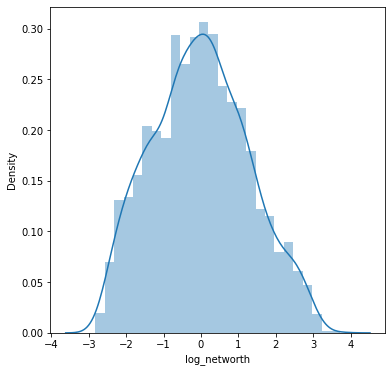

In [91]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0529367587842247
MSE: 1.6649144235482942
RMSE: 1.290315629428821


In [99]:
root = '../../data/ML_models/'

file = open(root + 'RidgeRegression.pkl', 'wb')
pickle.dump(ridgeModelChosen, file)
file.close()

### Lasso 

In [94]:
error = []

alpha = []
 
for i in range(1, 10):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(x_train, y_train)
    val_prediction = lassoModel.predict(x_val)
    scores = round(metrics.mean_absolute_error(y_val, val_prediction), 3)
    error.append(scores)
    alpha.append(i * 0.05)

for i in range(len(error)) : 
    print(f'aplha = {alpha[i]} --> RMSE = {error[i]}')

aplha = 0.05 --> RMSE = 1.041
aplha = 0.1 --> RMSE = 1.041
aplha = 0.15000000000000002 --> RMSE = 1.041
aplha = 0.2 --> RMSE = 1.041
aplha = 0.25 --> RMSE = 1.041
aplha = 0.30000000000000004 --> RMSE = 1.041
aplha = 0.35000000000000003 --> RMSE = 1.041
aplha = 0.4 --> RMSE = 1.041
aplha = 0.45 --> RMSE = 1.041


In [95]:
lassoModelChosen = Lasso(alpha = 0.2, tol = 0.0925)
lassoModelChosen.fit(x_train, y_train)

Lasso(alpha=0.2, tol=0.0925)

In [96]:
prediction = lassoModelChosen.predict(x_test)

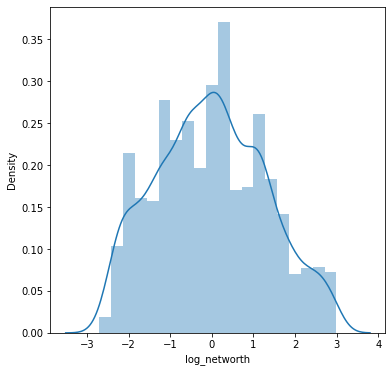

In [97]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0788476156794617
MSE: 1.7258908816192773
RMSE: 1.313731662714756
